<a href="https://colab.research.google.com/github/tonyyoon123/MachineLearning/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [0]:
import cmath 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data & Necessary Functions

In [0]:
data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [0]:
# Create an additional polynomial features to better fit the data
def map_feature(x1, x2, degree):  

  map= np.ones(len(x1)).reshape(len(x1),1)
  
  for i in range(1, degree + 1):
    for j in range(i + 1):
      columns = (x1**(i-j) * x2**j).reshape(len(x1), 1)
      map = np.hstack((map, columns))    #add new columns to the numpy array

  return map

In [0]:
# Sigmoid Function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [0]:
# Calculate the cost function
def cost_function(X, y, theta, lambdaa):

  m = len(y)
  param = (np.dot(X,theta))
  hypo = sigmoid(param)

  y0 = (1-y) * np.log(1-hypo)
  y1 = y*np.log(hypo)
  y2 = theta**2 

  cost = ((-1./m) * np.sum(y1 + y0)) + ((lambdaa/(2*m)) * np.sum(y2))
  return cost    

In [0]:
# gradient descent for the model 
def gradient_descent(X, y,iterations, learning_rate, lambdaa):

  theta = np.zeros(X.shape[1])  
  cost_history = []

  for i in range(iterations):
    param = (np.dot(X, theta))
    hypo = sigmoid(param)
    cost = cost_function(X, y, theta,lambdaa)
    cost_history.append(cost)
    gradient = np.dot(X.T, (hypo - y)) / y.size

    theta = theta - (learning_rate * (gradient + lambdaa * theta / y.size))
  return theta, cost_history

*Basic Settings*

In [0]:
iterations = 1000    #set the iterations to 1000
learning_rate = 1    # learning rate to 1
degree = 6           # polynomial degree  6 
map = map_feature(pointX, pointY, degree)

# *1. Plot the Data*

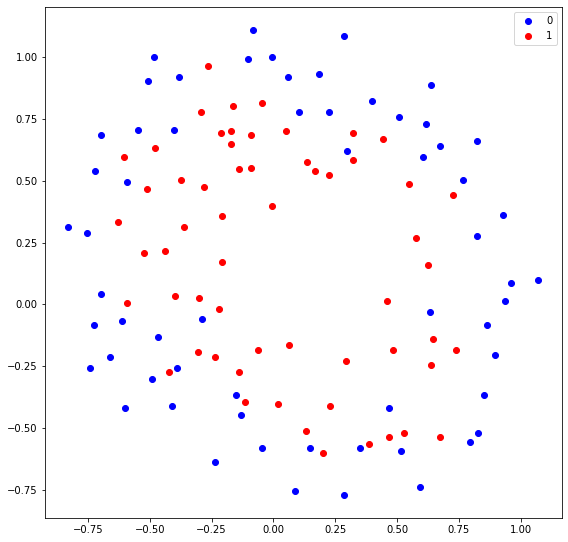

In [215]:
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='blue')
plt.scatter(pointX1, pointY1, c='red')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['0','1'])
plt.show()

# *2. Plot the training error with varying regularization parameters*

In [0]:
overfitting_cost = gradient_descent(map, label,iterations,learning_rate, 0.00001)
justright_cost  = gradient_descent(map, label,iterations,learning_rate, 0.01)
underfitting_cost = gradient_descent(map, label,iterations,learning_rate, 0.1)

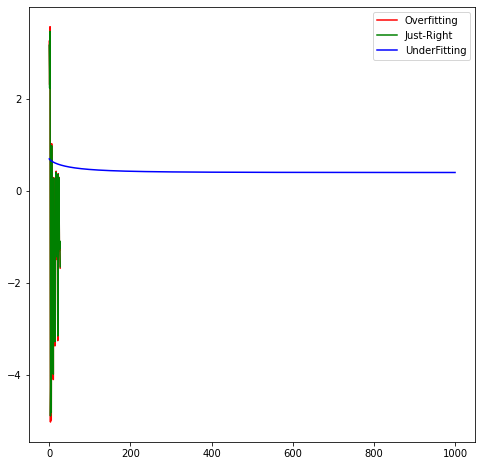

In [221]:
plt.figure(figsize=(8, 8))
plt.plot(overfitting_cost, label = "Overfitting", color = 'red')
plt.plot(justright_cost, label = "Just-Right", color = 'green')
plt.plot(underfitting_cost, label = "UnderFitting", color = 'blue')
plt.legend()
plt.show()

# 3. Display the values of the chosen regularization parameters

In [0]:
overfitting_lambdaa = gradient_descent(map, label,iterations,learning_rate, 0.00001)
justright_lambdaa  = gradient_descent(map, label,iterations,learning_rate, 0.01)
underfitting_lambdaa = gradient_descent(map, label,iterations,learning_rate, 0.1)

In [233]:
print("Overfitting :",overfitting_lambdaa)
print("Just-right : ", justright_lambdaa)
print("Underfitting : ", underfitting_lambdaa)

Overfitting : (array([ 3.2532183 ,  2.30681547,  3.56971033, -5.0293435 , -4.11199321,
       -4.98383088,  1.02486166, -1.50904515, -0.94909347, -0.33227628,
       -4.10618662,  0.28748655, -2.1887608 , -1.54718032, -3.37445747,
       -0.60870029, -0.70859367,  0.42604591, -1.29154491, -1.49612077,
       -0.24594663, -3.25974907,  0.37313369, -0.97073031,  0.29441988,
       -1.30746298, -1.14414538, -1.68160199]), [0.6931471805599454, 0.6812373156303896, 0.6719241567639634, 0.6639918231586602, 0.6568955525090083, 0.6503765923172423, 0.6442996403769923, 0.6385848281967367, 0.6331789280986542, 0.6280428288615801, 0.6231458292428039, 0.6184628430872294, 0.6139728867759746, 0.6096581604075468, 0.6055034257361436, 0.6014955485141235, 0.5976231429993984, 0.5938762868746766, 0.5902462885531043, 0.5867254953959165, 0.5833071347797074, 0.5799851819373991, 0.5767542497936546, 0.5736094969452985, 0.5705465506477249, 0.567561442231705, 0.5646505528306454, 0.5618105676705031, 0.559038437479820

# 4.Plot the training accuracy with varying regularization parameters